* [Company Summary Variables List](https://api.census.gov/data/2019/abscs/variables.html) <br/><br/>
* [Company Summary Documentation](https://www2.census.gov/programs-surveys/abs/technical-documentation/api/API2019-company-summary-1-26-2021.pdf)

In [63]:
# TOP 10 INDUSTRIES BY NUMBER OF EMPLOYEES IN THE USA

import matplotlib.pyplot as plt
import pandas as pd


labels = 'EMP,NAICS2017,NAICS2017_LABEL,NAME'  # Variables of interest
# EMP = # of Employees
# NAICS2017 = North American Industry Classification System Code
# NAICS2017_LABEL = Industry corresponding to NAICS2017 Code
# NAME = US State

data_group = '&for=state' # Breakdown by US State

API_key = '&key=1ba63b3df04e1bd07755febe18f836df1b86fc9f'

URL = f'https://api.census.gov/data/2018/abscs?get={labels}{data_group}{API_key}'

df = pd.read_json(URL)
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data after the header row
df.columns = new_header #set the header row as the df header
df = df.rename(columns={'NAICS2017_LABEL':'US Industry','EMP':'Number of Employees'})
df['Number of Employees'] = df['Number of Employees'].astype(int)
df = df.loc[df['NAICS2017']!='00']
df['US Industry'] = df['US Industry'].apply(lambda x:(x.replace('and','&')).title())
industries = df.copy()
df = df.groupby('US Industry')['Number of Employees'].sum().sort_values(ascending=False)
df = df.reset_index().head(10)
df.style.hide_index()

US Industry,Number of Employees
Health Care & Social Assistance,19123448
Retail Trade,15875874
Accommodation & Food Services,14275083
Administrative & Support & Waste Management & Remediation Services,12676136
Manufacturing,12006097
"Professional, Scientific, & Technical Services",9339232
Construction,6676901
Finance & Insurance,6577791
Wholesale Trade,6022815
Transportation & Warehousing,5049216


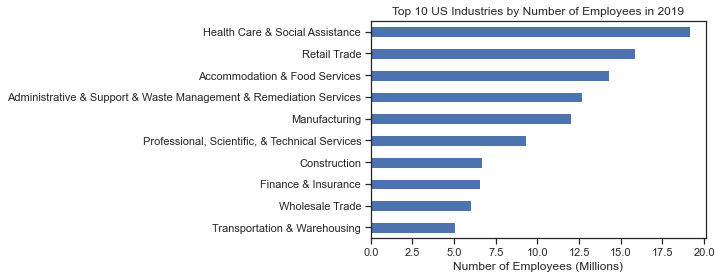

In [64]:
df = industries.copy()
df = df.groupby('US Industry')['Number of Employees'].sum().sort_values(ascending=True)

# Divide each EMP value by 1 million for to get number of employees in millions
df = df.apply(lambda x:float(x/1_000_000)).tail(10)
ax = df.plot(kind='barh', legend=False)

plt.title('Top 10 US Industries by Number of Employees in 2019')
plt.xlabel('Number of Employees (Millions)');
plt.ylabel('');

In [65]:
# TOP 10 STATES BY NUMBER OF EMPLOYER FIRMS

labels = 'NAME,FIRMPDEMP'

data_group = '&for=state'

API_key = '&key=1ba63b3df04e1bd07755febe18f836df1b86fc9f'

URL = f'https://api.census.gov/data/2018/abscs?get={labels}{data_group}{API_key}'

df = pd.read_json(URL)
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data after the header row
df.columns = new_header #set the header row as the df header
df = df.rename(columns={'NAME':'State','FIRMPDEMP':'Number of Employer Firms'})
df['Number of Employer Firms'] = df['Number of Employer Firms'].astype(int)
num_businesses_by_state = df.copy()
df = df[['State','Number of Employer Firms']].sort_values(by='Number of Employer Firms',ascending=False)

df = df.head(10)
df.style.hide_index()


State,Number of Employer Firms
California,738370
Florida,447363
New York,446155
Texas,425425
Illinois,245445
Pennsylvania,214291
New Jersey,187243
Georgia,174985
Ohio,170951
North Carolina,167837


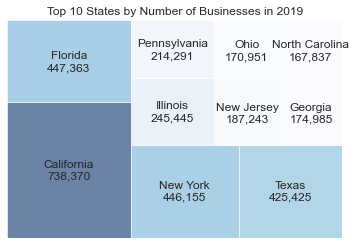

In [66]:
import matplotlib
import squarify
cmap = matplotlib.cm.Blues

minimum=min(df['Number of Employer Firms'])
maximum=max(df['Number of Employer Firms'])
norm = matplotlib.colors.Normalize(vmin=minimum, vmax=maximum)
labels = [f'{State}\n{"{:,}".format(count)}' for State, count in zip(df.State, df['Number of Employer Firms'])]

colors = [cmap(norm(value)) for value in df['Number of Employer Firms'].head(10)]
squarify.plot(sizes=df['Number of Employer Firms'].head(10), label=labels, alpha=0.6, color = colors)
plt.title('Top 10 States by Number of Businesses in 2019')
plt.axis('off')
plt.show()

In [69]:
# Number of Firms by Years in Business

labels = 'NAME,YIBSZFI,YIBSZFI_LABEL,FIRMPDEMP'

data_group = '&for=state'

API_key = '&key=1ba63b3df04e1bd07755febe18f836df1b86fc9f'

URL = f'https://api.census.gov/data/2018/abscs?get={labels}{data_group}{API_key}'

df = pd.read_json(URL)

new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data after the header row
df.columns = new_header #set the header row as the df header

df = df.rename(columns={'YIBSZFI_LABEL':'Years in Business','FIRMPDEMP':'Number of Employer Firms'})

df['Number of Employer Firms'] = df['Number of Employer Firms'].astype(int)

df = df.loc[df['Years in Business']!='All firms']

years_in_business = df.copy()
df = df.groupby('Years in Business')['Number of Employer Firms'].sum().reset_index()

custom_dict = {'Firms with less than 2 years in business': 0, 'Firms with 2 to 3 years in business': 1,\
 'Firms with 4 to 5 years in business': 2,'Firms with 6 to 10 years in business':   3, \
 'Firms with 11 to 15 years in business': 4, 'Firms with 16 or more years in business': 5} 

df = df.sort_values(by=['Years in Business'], key=lambda x: x.map(custom_dict),ascending=False)
df.style.hide_index()


Years in Business,Number of Employer Firms
Firms with 16 or more years in business,2046594
Firms with 11 to 15 years in business,816297
Firms with 6 to 10 years in business,915409
Firms with 4 to 5 years in business,523253
Firms with 2 to 3 years in business,698324
Firms with less than 2 years in business,824007


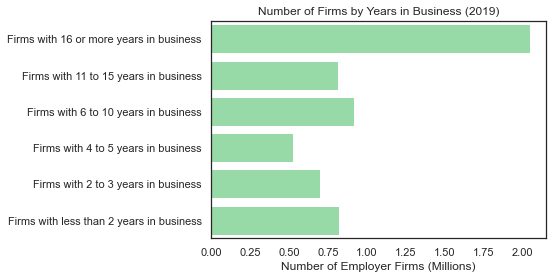

In [70]:
import seaborn as sns

sns.set_theme(style='ticks')
sns.set_theme(style="white", palette='pastel')


df['Number of Employer Firms'] = df['Number of Employer Firms'].apply(lambda x:float(x/1_000_000))


ax = sns.barplot(
    data=df,
    x="Number of Employer Firms", y="Years in Business", orient = 'h', color = 'g'
);

ax.set_title('Number of Firms by Years in Business (2019)')
ax.set_xlabel('Number of Employer Firms (Millions)')
ax.set_ylabel('');




In [71]:
# MASTER TABLE MERGE

master_table = industries.merge(num_businesses_by_state,how='left',on='state')
master_table = master_table.merge(years_in_business,how='left',on='state')
master_table = master_table.head(10)
master_table.style.hide_index()

Number of Employees,NAICS2017,US Industry,NAME_x,state,State,Number of Employer Firms_x,NAME_y,YIBSZFI,Years in Business,Number of Employer Firms_y
147752,44-45,Retail Trade,Mississippi,28,Mississippi,40856,Mississippi,318,Firms with 2 to 3 years in business,4432
147752,44-45,Retail Trade,Mississippi,28,Mississippi,40856,Mississippi,319,Firms with 4 to 5 years in business,3201
147752,44-45,Retail Trade,Mississippi,28,Mississippi,40856,Mississippi,321,Firms with 6 to 10 years in business,6455
147752,44-45,Retail Trade,Mississippi,28,Mississippi,40856,Mississippi,322,Firms with 11 to 15 years in business,5790
147752,44-45,Retail Trade,Mississippi,28,Mississippi,40856,Mississippi,323,Firms with 16 or more years in business,16079
147752,44-45,Retail Trade,Mississippi,28,Mississippi,40856,Mississippi,311,Firms with less than 2 years in business,4894
7122,11,"Agriculture, Forestry, Fishing & Hunting",Mississippi,28,Mississippi,40856,Mississippi,318,Firms with 2 to 3 years in business,4432
7122,11,"Agriculture, Forestry, Fishing & Hunting",Mississippi,28,Mississippi,40856,Mississippi,319,Firms with 4 to 5 years in business,3201
7122,11,"Agriculture, Forestry, Fishing & Hunting",Mississippi,28,Mississippi,40856,Mississippi,321,Firms with 6 to 10 years in business,6455
7122,11,"Agriculture, Forestry, Fishing & Hunting",Mississippi,28,Mississippi,40856,Mississippi,322,Firms with 11 to 15 years in business,5790
